# 🎆 Convolutions

In this notebook, we'll walk through how convolutional filters can pick out different aspects of an image

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

## 0. Original Input Image <a name="orig"></a>

(64, 64)


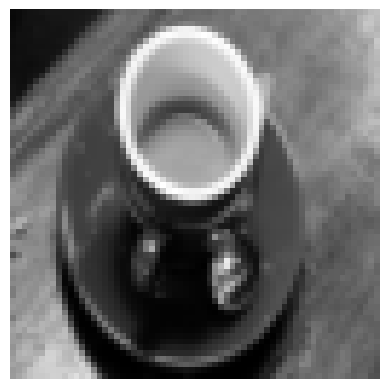

In [2]:
im = rgb2gray(data.coffee())
im = resize(im, (64, 64))
print(im.shape)

plt.axis("off")
plt.imshow(im, cmap="gray")

## Horizontal Edge Filter <a name="hor"></a>

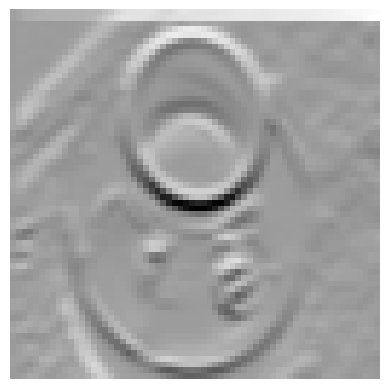

In [3]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Vertical Edge Filter <a name="ver"></a>

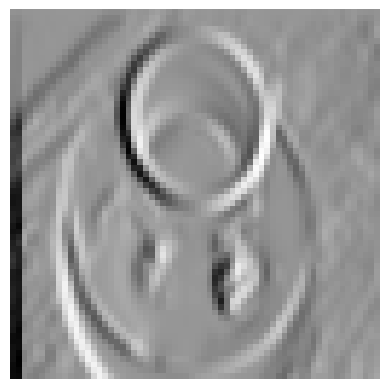

In [4]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

In [11]:
def filter_image(image, filter):
    new_image = np.zeros(image.shape)

    im_pad = np.pad(image, 1, "constant")

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            try:
                new_image[i, j] = (
                    im_pad[i - 1, j - 1] * filter[0, 0]
                    + im_pad[i - 1, j] * filter[0, 1]
                    + im_pad[i - 1, j + 1] * filter[0, 2]
                    + im_pad[i, j - 1] * filter[1, 0]
                    + im_pad[i, j] * filter[1, 1]
                    + im_pad[i, j + 1] * filter[1, 2]
                    + im_pad[i + 1, j - 1] * filter[2, 0]
                    + im_pad[i + 1, j] * filter[2, 1]
                    + im_pad[i + 1, j + 1] * filter[2, 2]
                )
            except Exception:
                pass
    return new_image

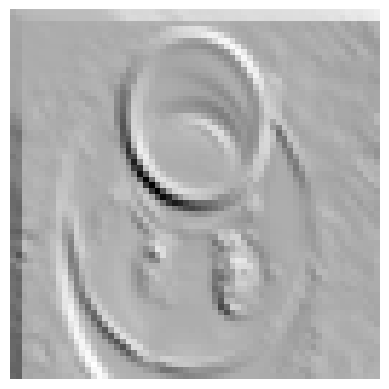

In [12]:
# try diagonal filters
filter1 = np.array([[0, 1, 0], [-1, 0, 1], [0, -1, 0]])
plt.axis("off")
plt.imshow(filter_image(im, filter1), cmap="Greys")

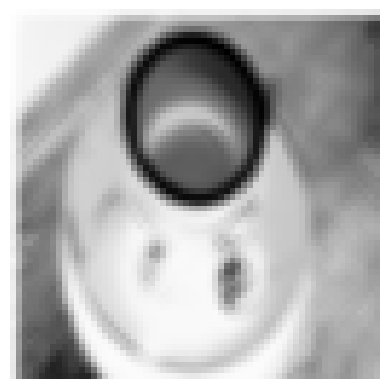

In [13]:
# star filter
filter2 = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
plt.axis("off")
plt.imshow(filter_image(im, filter2), cmap="Greys")

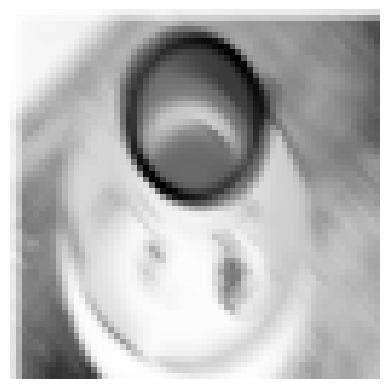

In [15]:
# star filter
filter3 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
plt.axis("off")
plt.imshow(filter_image(im, filter3), cmap="Greys")

## Horizontal Edge Filter with Stride 2 <a name="hor2"></a>

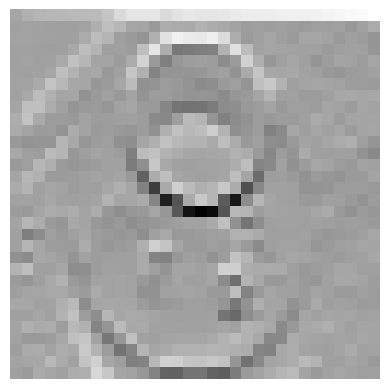

In [5]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Vertical Edge Filter with Stride 2 <a name="ver2"></a>

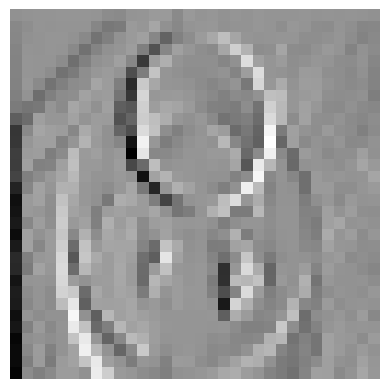

In [6]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")